In [94]:
import lasagne
reload(spatial_ae)
from spatial_ae import test_network
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

%matplotlib inline

In [95]:
pred, actual, fp, imgs = test_network(weights_file='spatial_ae_adam_11_21.npz', get_fp=True)

Building model and compiling functions...


In [96]:
# Evaluate Error
error = ((pred-actual)**2).sum()/pred.shape[0]/2.0
print 'Reconstruction Error: '+str(error)

Reconstruction Error: 6.75087528569e-05


In [97]:
pred_imgs = np.reshape(pred, (pred.shape[0],60,60))
actual_imgs = np.reshape(actual, (actual.shape[0],60,60))
imgs = np.uint8(np.transpose(imgs, (0,2,3,1)))
fps = np.reshape((fp+1)*240/2, (imgs.shape[0], 32, 2))

Example reconstructions


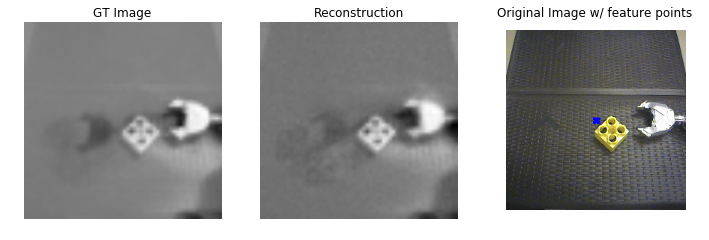

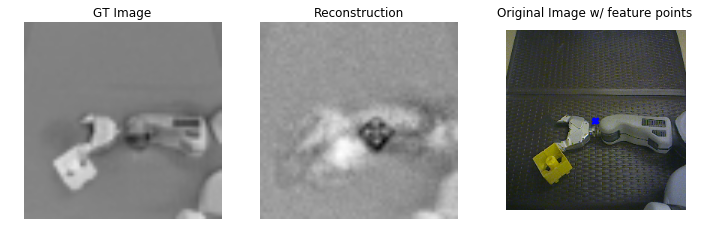

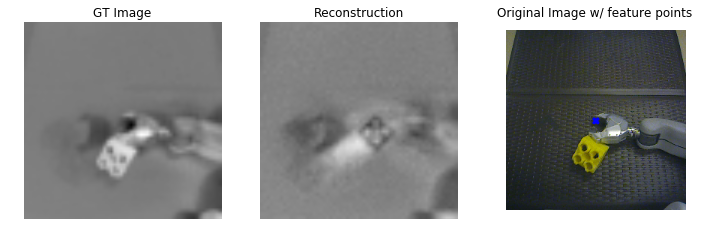

In [98]:
idx = [0,215,115]
plt.clf()
print('Example reconstructions')

for i in idx:
    vmin = min(pred_imgs[i].min(), actual_imgs[i].min())
    vmax = max(pred_imgs[i].max(), actual_imgs[i].max())
    
    plt.figure(figsize=(12,5));
    plt.subplot(1,3,1)
    plt.imshow(actual_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('GT Image'); plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(pred_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('Reconstruction'); plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(imgs[i]);
    plt.title('Original Image w/ feature points');
    plt.hold(True); plt.axis('off')
    plt.scatter(fps[i,:,0], fps[i,:,1], marker='x')